### Programming Assignment 3 - Clustering Analysis on Wine Dataset

### Import Required Libraries

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

### Load and Preprocess the Wine Dataset

In [44]:
# Loading dataset, excluding data from first column
data = pd.read_csv('wine.csv')
X = data.iloc[:, 1:]  

# Scaling the data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

### Task 1: K-means Clustering

In [45]:
#Appllied k-means clustering on dataset 

print("Task 1: K-means Clustering")
sse = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=15, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    print(f"For k = {k} After 15 iterations: Error = {kmeans.inertia_:.2f}")

Task 1: K-means Clustering
For k = 2 After 15 iterations: Error = 1661.68
For k = 3 After 15 iterations: Error = 1277.93
For k = 4 After 15 iterations: Error = 1211.75
For k = 5 After 15 iterations: Error = 1123.16
For k = 6 After 15 iterations: Error = 1079.54
For k = 7 After 15 iterations: Error = 1014.43
For k = 8 After 15 iterations: Error = 982.65


#### Plot SSE vs Number of Clusters (Elbow Method):

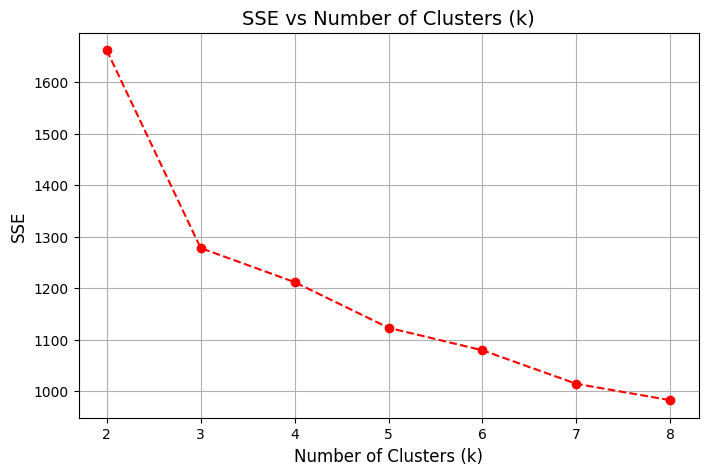

In [46]:
# Displaying the SSE Error vs k plot and using elbow method

plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), sse, marker='o', linestyle='--', color='r')
plt.title('SSE vs Number of Clusters (k)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('SSE', fontsize=12)
plt.grid(True)
plt.xticks(range(2, 9))
plt.show()

### Choosing the Optimal k Using the Elbow Method:

- From the SSE vs. Number of Clusters graph, observe that the SSE decreases steeply up to \( k=3 \), after which the rate of reduction slows significantly. 
- This indicates that \( k=3 \) is the optimal number of clusters.
- This conclusion balances minimizing error while avoiding overfitting with too many clusters.


### Task 2: Hierarchical Clustering

#### Single-Link Clustering

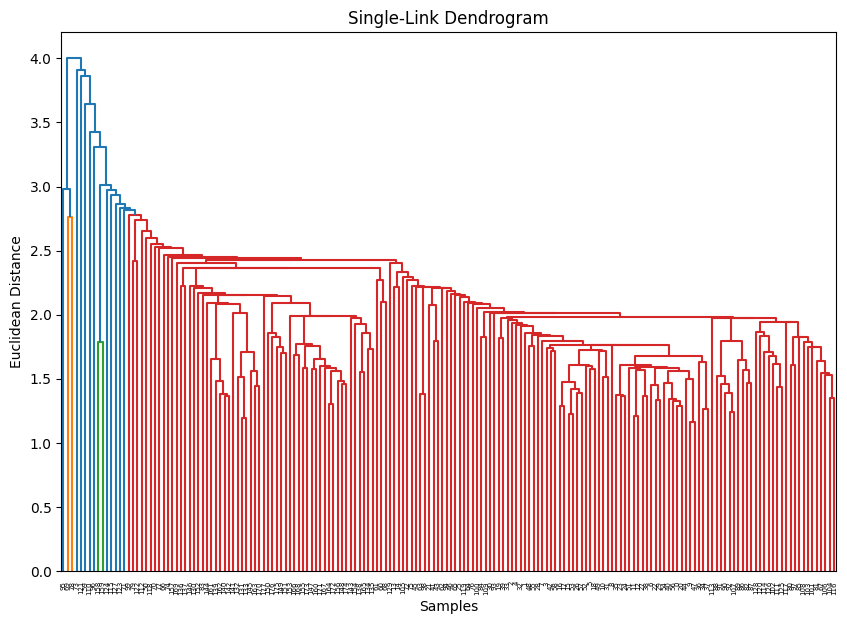

Silhouette Coefficient for Single-Link (k=3): 0.18


In [47]:
# Perform single-Link Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='single', metric='euclidean'))
plt.title('Single-Link Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Calculating silhouette coefficient for Single-Link (k=3)
single_link = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
single_labels = single_link.fit_predict(data_scaled)
single_silhouette = silhouette_score(data_scaled, single_labels)
print(f"Silhouette Coefficient for Single-Link (k=3): {single_silhouette:.2f}")

#### Complete-Link Clustering

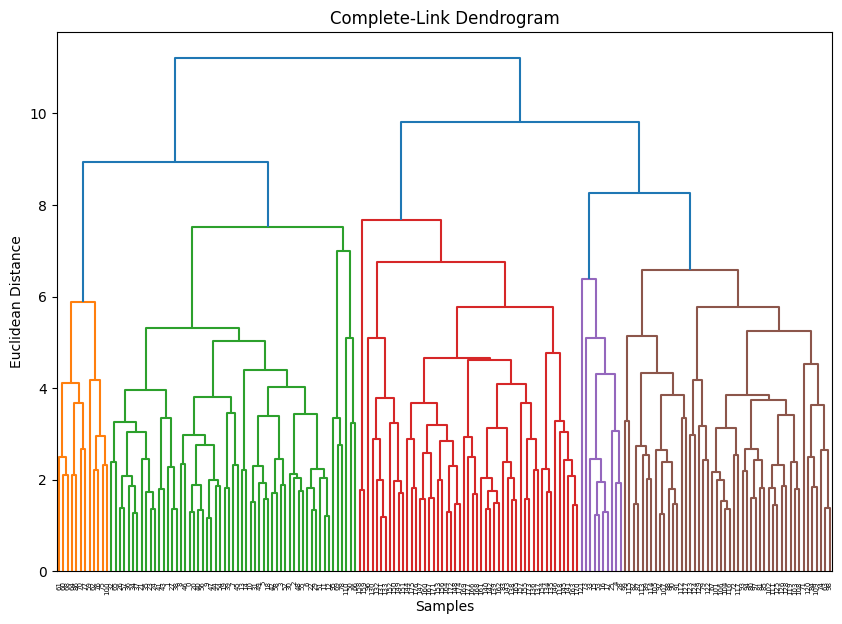

Silhouette Coefficient for Complete-Link (k=3): 0.20


In [48]:
# Perform complete-Link Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='complete', metric='euclidean'))
plt.title('Complete-Link Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Calculating silhouette coefficient for Complete-Link (k=3)
complete_link = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
complete_labels = complete_link.fit_predict(data_scaled)
complete_silhouette = silhouette_score(data_scaled, complete_labels)
print(f"Silhouette Coefficient for Complete-Link (k=3): {complete_silhouette:.2f}")
